<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Support_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC

In [73]:
X, y = make_moons(noise=0.1)

In [74]:
from sklearn.pipeline import Pipeline

poly_svm = Pipeline([
  ('add_poly', PolynomialFeatures(degree=3)),
  ('scaler', StandardScaler()),
  ('model', LinearSVC(C=10, loss='hinge'))
])

poly_svm.fit(X,y)

Pipeline(memory=None,
         steps=[('add_poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y, poly_svm.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



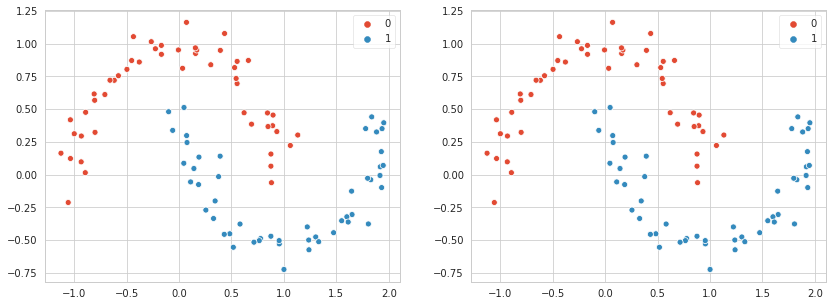

In [76]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(X[:,0], X[:,1], hue=y, ax=ax[0]);
sns.scatterplot(X[:,0], X[:,1], hue=poly_svm.predict(X), ax=ax[1]);


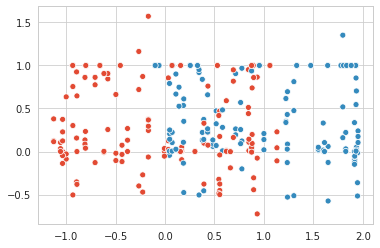

In [77]:
sns.scatterplot(X[:,0], PolynomialFeatures(degree=3).fit_transform(X[:,1].reshape(-1,1)).reshape(-1,)[:100], hue=poly_svm.predict(X));
sns.scatterplot(X[:,0], PolynomialFeatures(degree=3).fit_transform(X[:,1].reshape(-1,1)).reshape(-1,)[100:200], hue=poly_svm.predict(X));
sns.scatterplot(X[:,0], PolynomialFeatures(degree=3).fit_transform(X[:,1].reshape(-1,1)).reshape(-1,)[200:300], hue=poly_svm.predict(X));
plt.legend().remove();


In [78]:
kernel_svm = Pipeline([
  ('scaler', StandardScaler()),
  ('model', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

kernel_svm.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y, poly_svm.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



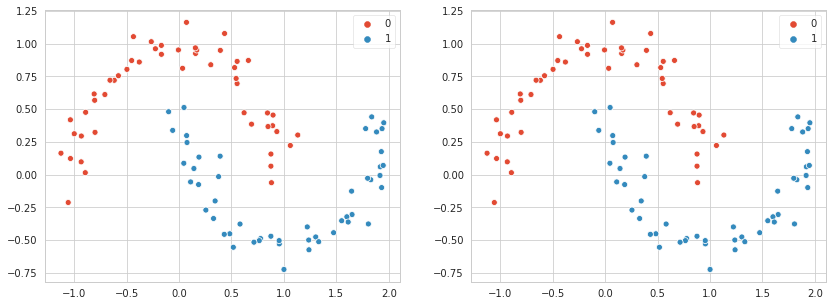

In [88]:
rbf_svm = Pipeline([
  ('scaler', StandardScaler()),
  ('model', SVC(kernel='rbf', gamma=5, C=5))
])

rbf_svm.fit(X, y)
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(X[:,0], X[:,1], hue=y, ax=ax[0]);
sns.scatterplot(X[:,0], X[:,1], hue=rbf_svm.predict(X), ax=ax[1]);


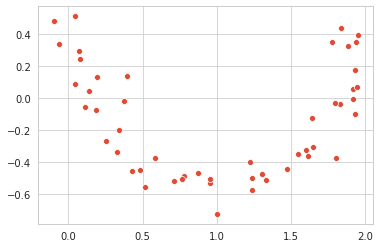

In [102]:
X_1 = X[np.where(y==1)[0]][:,0]
y_1 = X[np.where(y==1)[0]][:,1]
sns.scatterplot(X_1, y_1);

In [134]:
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_1.reshape(-1,1), y_1)
print(np.sqrt(mean_squared_error(y_1, svm_reg.predict(X_1.reshape(-1,1)))))

0.36735686687196245


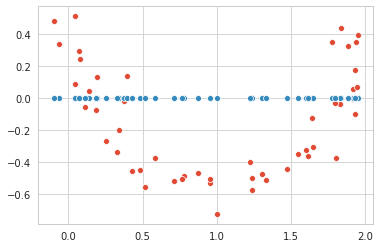

In [135]:
sns.scatterplot(X_1,y_1)
sns.scatterplot(X_1, svm_reg.predict(X_1.reshape(-1,1)))

In [183]:
svm_reg = SVR(epsilon=0.1, kernel='rbf', degree=2,C=100, gamma=500)
svm_reg.fit(X_1.reshape(-1,1), y_1)
print(np.sqrt(mean_squared_error(y_1, svm_reg.predict(X_1.reshape(-1,1)))))

0.10468185310652302


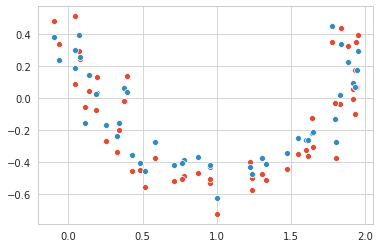

In [184]:
sns.scatterplot(X_1,y_1)
sns.scatterplot(X_1, svm_reg.predict(X_1.reshape(-1,1)))